Political Influence on Stock Market Performance Analysis

In [2]:
!pip install --upgrade jupyterlab jupyterlab-git


     ---------------------------------------- 12.3/12.3 MB 7.3 MB/s eta 0:00:00
     -------------------------------------- 367.7/367.7 kB 7.6 MB/s eta 0:00:00
     -------------------------------------- 444.8/444.8 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 73.5/73.5 kB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 69.4/69.4 kB 3.7 MB/s eta 0:00:00
     -------------------------------------- 386.9/386.9 kB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 59.7/59.7 kB ? eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 78.8/78.8 kB ? eta 0:00:00
     -------------------------------------- 628.7/628.7 kB 7.9 MB/s eta 0:00:00
     ---------------------------------------- 106.1/106.1 kB ? eta 0:00:00
     ---------------------------------------- 58.8/58.8 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 89.2/89.2 kB 5.

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Delyan\\anaconda3\\Lib\\site-packages\\~ornado\\speedups.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [7]:
!pip install yfinance

In [25]:
!pip install --upgrade yfinance

In [1]:
import pandas as pd
import yfinance as yf

sp500 = yf.download('^GSPC', start = '1920-01-17', end='2025-03-11')

sp500.to_csv('sp500.csv')

sp500df = pd.read_csv('sp500.csv', index_col='Price', parse_dates=True)
sp500df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Price,,,,,
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,NaN,NaN,NaN,NaN,NaN
1927-12-30,17.65999984741211,17.65999984741211,17.65999984741211,17.65999984741211,0
1928-01-03,17.760000228881836,17.760000228881836,17.760000228881836,17.760000228881836,0
1928-01-04,17.719999313354492,17.719999313354492,17.719999313354492,17.719999313354492,0


In [62]:
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime

start = datetime(2024, 1, 10)
end = datetime(2025, 6, 1)

# Fetch data using yfinance
data = yf.download('^GSPC', start=start, end=end)

# Add dummy variable: 1 if Close > Open = 1, else 0
data[('dummy_var')] = (data[('Close', '^GSPC')] > data[('Open', '^GSPC')]).astype(int)
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,dummy_var
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,
Date,,,,,,
2024-01-10,4783.450195,4790.799805,4756.200195,4759.939941,3498680000,1
2024-01-11,4780.240234,4798.500000,4739.580078,4792.129883,3759890000,0
2024-01-12,4783.830078,4802.399902,4768.979980,4791.180176,3486340000,0
2024-01-16,4765.979980,4782.339844,4747.120117,4772.350098,4260550000,0
2024-01-17,4739.209961,4744.229980,4714.819824,4739.129883,3928600000,1
...,...,...,...,...,...,...
2025-05-23,5802.819824,5829.509766,5767.410156,5781.890137,4662820000,1
2025-05-27,5921.540039,5924.330078,5854.069824,5854.069824,5366380000,1


In [61]:
data['Low']

Ticker,^GSPC
Date,
2024-01-10,4756.200195
2024-01-11,4739.580078
2024-01-12,4768.979980
2024-01-16,4747.120117
2024-01-17,4714.819824
...,...
2025-05-23,5767.410156
2025-05-27,5854.069824
2025-05-28,5881.879883


In [53]:
# Drop NA and select correct columns
clean_data = data[[('Close', '^GSPC'), ('dummy_var', '')]].dropna()
#clean_data
corr = clean_data[('Close', '^GSPC')].corr(clean_data[('dummy_var', '')])
corr


0.06120669127518778

In [59]:
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 348 entries, 2024-01-10 to 2025-05-30
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^GSPC)   348 non-null    float64
 1   (High, ^GSPC)    348 non-null    float64
 2   (Low, ^GSPC)     348 non-null    float64
 3   (Open, ^GSPC)    348 non-null    float64
 4   (Volume, ^GSPC)  348 non-null    int64  
 5   (dummy_var, )    348 non-null    int32  
dtypes: float64(4), int32(1), int64(1)
memory usage: 17.7 KB


<Axes: xlabel='Date'>

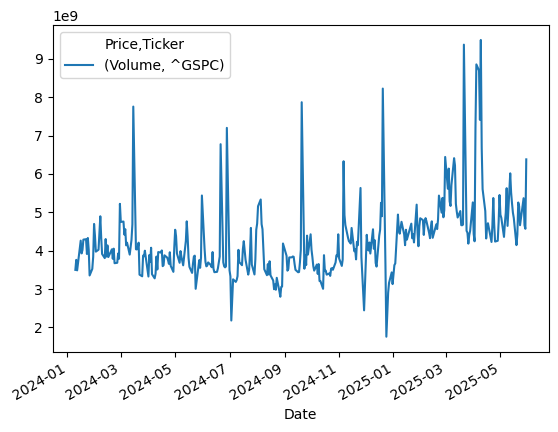

In [10]:
data[['Volume']].plot()

In [31]:
start = datetime(2025, 2, 17)
end = datetime(2025, 3, 11)

# Fetch data using yfinance
data = yf.download('AAPL', start=start, end=end)
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-02-18,244.470001,245.179993,241.839996,244.149994,48822500
2025-02-19,244.869995,246.009995,243.160004,244.660004,32204200
2025-02-20,245.830002,246.779999,244.289993,244.940002,32316900
2025-02-21,245.550003,248.690002,245.220001,245.949997,53197400
2025-02-24,247.100006,248.860001,244.419998,244.929993,51326400
2025-02-25,247.039993,250.000000,244.910004,248.000000,48013300
2025-02-26,240.360001,244.979996,239.130005,244.330002,44433600
2025-02-27,237.300003,242.460007,237.059998,239.410004,41153600


In [63]:
start = datetime(2025, 2, 17)
end = datetime(2025, 3, 28)

# Fetch data using yfinance
data = yf.download('^IXIC', start=start, end=end)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^IXIC,^IXIC,^IXIC,^IXIC,^IXIC
Date,,,,,
2025-02-18,20041.259766,20110.119141,19909.740234,20090.550781,8683170000
2025-02-19,20056.250000,20099.390625,19928.890625,19994.500000,8171530000
2025-02-20,19962.359375,20041.150391,19795.019531,20029.189453,7329270000
2025-02-21,19524.009766,20016.660156,19510.910156,20006.689453,8461020000
2025-02-24,19286.929688,19644.230469,19275.460938,19590.849609,7414760000


In [20]:
self._set_session(session or requests.Session(impersonate="chrome"))

NameError: name 'self' is not defined

In [24]:
  from curl_cffi import requests
  session = requests.Session(impersonate="chrome")
  ticker = yf.Ticker('^IXIC', session=session)

In [ ]:
Първо емпиричната част
с 0 и 1 - регресионен модел(като фактор), може да се добави и обема като фактор

1.Информация за индексите /Сваляне на данните
Уточнаване на събития
2. Информация за анализите или политически събития; почистване. спад, скок
    Подготовка на данните, графики, описания на динамиката; процент на прираст
    Трениране на модел
3. Метода с който правя нещо, 
4. поне 9 месеца
